# 33. Regularization

## 1.들어가며

### 학습 목표
---
* 정칙화(Regularization)의 개념을 이해하고 정규화(Normalization)와 구분한다.
* L1 regularization과 L2 regularization의 차이를 설명한다.
* 실습을 통하여 Lp norm, Dropout, Batch Normalization에 대해 학습한다.

### 목차
---
1. 들어가며
2. Regularization과 Normalization
3. L1 Regularization
4. L2 Regularization
5. Extra : Lp norm
6. Dropout
7. Batch Normalization

## 2. Regularization과 Normalization

### Regularization? Normalization?
---
Regularization과 Normalization 이 두 개념은 서로 헷갈리는 경우가 많은 것 같다. 한국어로 번역할 때 두 개념이 다 '정규화'로 번역될 때가 많아서 더욱 혼란스러울 때가 많다. 우선 두 개념을 아래와 같이 정리해보자.

__Regularization : 정칙화__라고 불리며, 오버피팅을 해결하기 위한 방법 중의 하나이다. __L1, L2 Regularization, Dropout, Batch normalization__ 등이 있다. 이 방법들은 모두 오버피팅을 해결하고자 하는 방법 중에 하나이다. 오버피팅은 한국어로 과적합이라고 하며, train set은 매우 잘 맞추지만, validation/test set은 맞추지 못하는 현상을 말한다. 비유하자면 오버피팅은 기출문제는 외워서 잘 맞추지만 새로운 응용 문제로 시험을 볼 때는 잘 풀지 못하는 경우라고 할 수 있겠다. 더 좋은 결과를 얻기 위해서는 새로운 시험 즉, test set 에서도 잘 맞춰야한다. 이를 위해서 제안된 다양한 Regularization 기법들은 모델이 train set의 loss를 낮추는데만 집중하여 과적합하지 않도록 하는 효과를 가진다.

__Normalization : 정규화__라고 불리며, 이는 데이터의 형태를 좀 더 의미있게, 혹은 트레이닝에 적합하게 전처리하는 과정이다. 데이터를 z-score로 바꾸거나 minmax scaler를 사용하여 0과 1사이의 값으로 분포를 조정하는 것들이 해당된다. 예를 들어, 금액과 같은 큰 범위의 값(10,000 ~ 10,000,000)과 시간(0~24) 의 값이 들어가는 경우, 학습 초반에는 데이터 거리간의 측정이 피처 값의 범위 분포 특성에 의해 왜곡되어 학습에 방해를 받게 되는 문제가 있다. Normalization은 이를 모든 피처의 범위 분포를 동일하게 하여 모델이 풀어야 하는 문제를 좀더 간단하게 바꾸어 주는 전처리 과정이다.

핵심을 정리하면, Regularization은 오버피팅을 막고자 하는 방법, Normalization은 트레이닝을 할 때에 서로 범위가 다른 데이터들을 같은 범위로 바꿔주는 전처리 과정이라는 것이다.

Regularization와 Normalization의 간단한 예제를 [Iris dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset)의 회귀 문제를 풀면서 비교해보겠다.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd 
import matplotlib.pyplot as plt

iris=load_iris()
iris_df=pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data= iris.target, columns= ['species'])

def converter(specie):
    if specie == 0:
        return 'setosa'
    elif specie == 1:
        return 'versicolor'
    else:
        return 'virginica'

target_df['species'] = target_df['species'].apply(converter)

# Concatenate the DataFrames
iris_df = pd.concat([iris_df, target_df], axis= 1)

Iris data 중 virginica라는 종의 petal length(꽃잎 길이)를 X, sepal length(꽃받침의 길이)를 Y로 두고 print 해보겠다.

In [2]:
X=[iris_df['petal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']
Y=[iris_df['sepal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']

print(X)
print(Y)

[6.0, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5.0, 5.1, 5.3, 5.5, 6.7, 6.9, 5.0, 5.7, 4.9, 6.7, 4.9, 5.7, 6.0, 4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5.0, 5.2, 5.4, 5.1]
[6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0, 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0, 6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]


값으로만 보니 직관적으로 잘 와닿지않는다. 산점도로 그려보자.

아직 Normalization을 하지 않았기 때문에 x축과 y축은 각각의 최솟값과 최댓값의 범위로 그려진다.

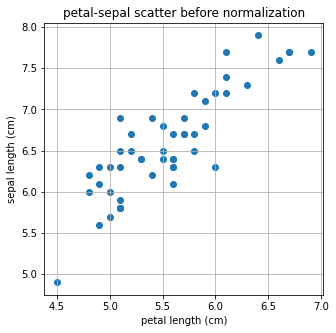

In [3]:
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.title('petal-sepal scatter before normalization') ###########(210314 추가)
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

0-1로 normlization을 해주는 `minmax_scaler`를 이용해서 산점도를 다시한번 그려보겠다.

결과를 비교해보면, 가장 큰 값을 1, 가장 작은 값을 0으로 하여 축이 바뀜을 확인할 수 있다.

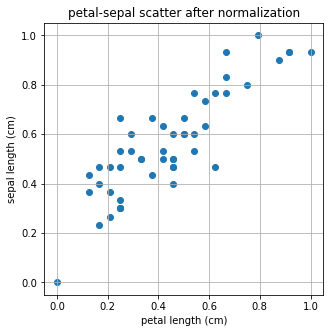

In [4]:
from sklearn.preprocessing import minmax_scale
X_scale=minmax_scale(X)
Y_scale=minmax_scale(Y)

plt.figure(figsize=(5,5))
plt.scatter(X_scale,Y_scale)
plt.title('petal-sepal scatter after normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

결과를 비교해보면, 가장 큰 값을 1, 가장 작은 값을 0으로 하여 __축이 바뀜__을 확인할 수 있다. 데이터의 상대적인 분포는 바뀌지 않았지만, 피처의 스케일이 0과 1 사이로 변환되었으므로 이후 X, Y의 관계를 다루기 용이해졌다.

---
이번엔 같은 데이터로 간단한 회귀 문제를 풀면서 Regularization에 대해 알아보겠다.

`sklearn.linear_model`에 포함된 `LinearRegression` 모델을 사용하여 X-Y 관계를 선형으로 모델링해 보겠다. 이 `sklearn.linear_model`에는 L1, L2 Regression인 `Lasso`와 `Ridge` 모델도 함께 포함되어 있으므로, 이들의 차이점을 먼저 직관적으로 이해해 보겠다. 수학적 정의나 보다 구체적인 설명은 다음 스텝에 이어진다.

In [5]:
from sklearn.linear_model import LinearRegression
import numpy as np 
X=np.array(X)
Y=np.array(Y)

# Iris Dataset을 Linear Regression으로 학습합니다. 
linear= LinearRegression()
linear.fit(X.reshape(-1,1), Y)

# Linear Regression의 기울기와 절편을 확인합니다. 
a, b=linear.coef_, linear.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

기울기 : 1.00, 절편 : 1.06


위에서 Linear regression 으로 구한 기울기와 절편을 가지고 일차함수를 만들어 산점도와 함께 그려보겠다.

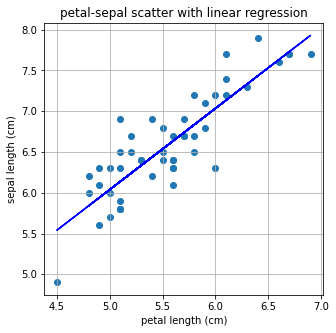

In [6]:
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,linear.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with linear regression') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

이번에는 L1, L2 Regularization으로 Regression을 해보겠다. 이는 `Lasso`, `Ridge`라고 부른다.

먼저 L1 regularization인 `Lasso`로 문제를 풀어보겠다.

기울기 : 0.00, 절편 : 6.59


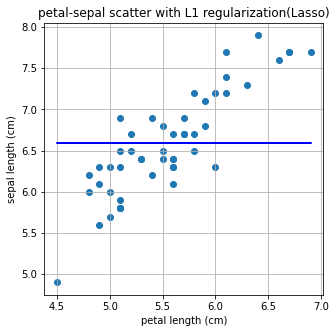

In [7]:
#L1 regularization은 Lasso로 import 합니다.
from sklearn.linear_model import Lasso
L1= Lasso()
L1.fit(X.reshape(-1,1), Y)
a, b=L1.coef_, L1.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L1.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with L1 regularization(Lasso)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

어떤가? 기울기가 0으로 나오는 모습니다. `Lasso` 방법은 제대로 문제를 풀어내지 못하는 것 같다.

이제 같은 데이터셋으로 L2 regularization인 `Ridge`로 문제를 풀어보고 서로 비교해보겠다.

기울기 : 0.93, 절편 : 1.41


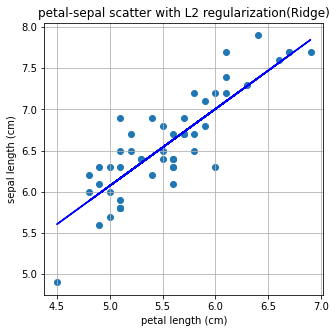

In [8]:
#L2 regularization은 Ridge로 import 합니다. 
from sklearn.linear_model import Ridge
L2= Ridge()
L2.fit(X.reshape(-1,1), Y)
a, b=L2.coef_, L2.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L2.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with L2 regularization(Ridge)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

다시 다루겠지만, Linear Regression이 L2 Norm과 관련이 있다. 그래서 L2 Regularization을 쓰는 `Ridge`방법으로는 앞서 Linear Regression과 큰 차이가 없는 결과가 나온다.

그러나 왜 L1 Regularization을 쓰는 `Lasso`에서는 답이 나오지 않았을까?

다음 스텝에서 그 이유를 알아보도록 하자.

## 3. L1 Regularization
저번 시간에 Regularization과 Normalization에 대한 정의에 대해 설명하고, L1/L2 Regularization을 코드로 맛보기 해보았다. 마지막에 같은 Linear Regression 문제를 푸는데 L1 Regularization에서는 문제가 풀리지 않았다.

이번 시간에는 L1 Regularization에 대한 자세한 이해를 통해, 지난 스텝에서 Lasso로는 Regression 문제가 풀리지 않았던 이유를 알아보겠다. 그리고 어떤 때에 L1 Regularization을 사용하는지 알아보는 것이 목표이다.

### L1 regularization (Lasso)의 정의
---
L1 regularization은 아래와 같은 식으로 정의된다.

$$\hat{\beta}^{lasso}:=arg\, min $$